# Kaggle - Forecast use of a city bikeshare system
## Capital Bikeshare, Washington, D.C.

## Exploratory data analysis

In [169]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, HTML

In [139]:
# create dataframe and preview hourly data

df = pd.read_csv("train.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# check datatypes for columns

df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [4]:
# convert datetime to proper type

df['datetime_converted'] = pd.to_datetime(df.datetime)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_converted
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00


In [5]:
# check the types again

df.dtypes

datetime                      object
season                         int64
holiday                        int64
workingday                     int64
weather                        int64
temp                         float64
atemp                        float64
humidity                       int64
windspeed                    float64
casual                         int64
registered                     int64
count                          int64
datetime_converted    datetime64[ns]
dtype: object

In [6]:
# now drop old datetime column

df.drop('datetime', axis=1, inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_converted
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00


In [7]:
# rename converted datetime column to original name

df.rename(columns={'datetime_converted': 'datetime'}, inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00


In [8]:
# move datetime back to the first column position

hour_col = df['datetime']
df.drop('datetime', axis=1, inplace=True)
df.insert(0, 'datetime', hour_col)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
# how many rows do we have

df.shape

(10886, 12)

In [10]:
# basic statistics for all columns

df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-06-09 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


In [11]:
# are there any NaN values?

df.isnull().values.any()

False

In [12]:
# create new columns for hour of day, month number, day of week number, and year
# drop the datetime column since the important parts have been extracted

df["hour"] = df.datetime.dt.hour
df["month"] = df.datetime.dt.month
df["dow"] = df.datetime.dt.dayofweek # Monday=0, Sunday=6
df["year"] = df.datetime.dt.year
df.drop("datetime", axis=1, inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,dow,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,5,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,5,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,5,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,5,2011


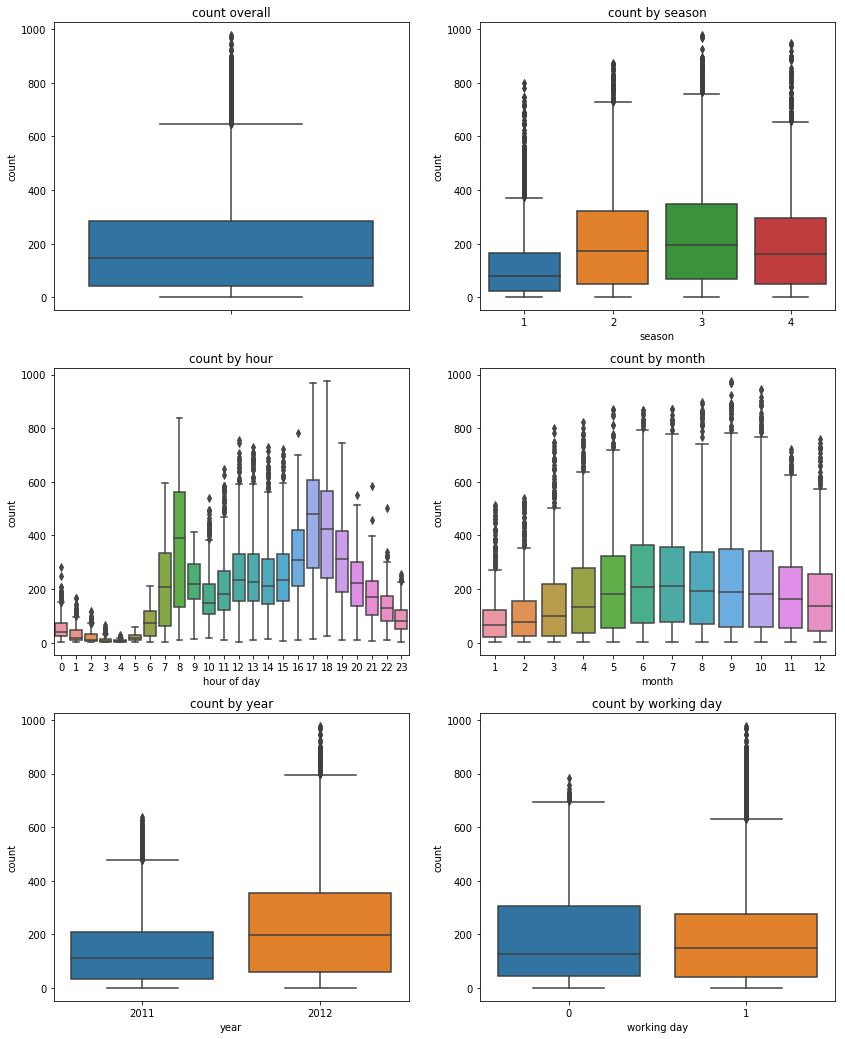

In [13]:
# create boxplots for "count" (hourly bikeshare users) overall and by season, hour, month, year, and working day
# this will help spot outliers

fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(14, 18)
sns.boxplot(data=df, y="count", orient="v", ax=axes[0][0])
sns.boxplot(data=df, y="count", x="season", orient="v", ax=axes[0][1])
sns.boxplot(data=df, y="count", x="hour", orient="v", ax=axes[1][0])
sns.boxplot(data=df, y="count", x="month", orient="v", ax=axes[1][1])
sns.boxplot(data=df, y="count", x="year", orient="v", ax=axes[2][0])
sns.boxplot(data=df, y="count", x="workingday", orient="v", ax=axes[2][1])

axes[0][0].set(ylabel="count", title="count overall")
axes[0][1].set(xlabel="season", ylabel="count", title="count by season")
axes[1][0].set(xlabel="hour of day", ylabel="count", title="count by hour")
axes[1][1].set(xlabel="month", ylabel="count", title="count by month")
axes[2][0].set(xlabel="year", ylabel="count", title="count by year")
axes[2][1].set(xlabel="working day", ylabel="count", title="count by working day")

**Some observations:**
* The overall plot shows that there's a lot of outliers in our data (points past the upper whisker)
* Spring (1) surprisingly has much lower bikeshare demand than other seasons
* There are spikes in usage between 7-9AM and 4-7PM which correspond with typical commute times; 10AM-3PM have a lot of outliers, I'm guessing this could be weekdays vs. weekends
* June through September appear to have the highest demand on average
* 2012 displays a significant lift in bikeshare usage compared to 2011
* There are far more outliers on working days compared to non-working days

*I'm not sure that the outliers should be removed just yet, since they may be meaningful for prediction, depending on the model used*

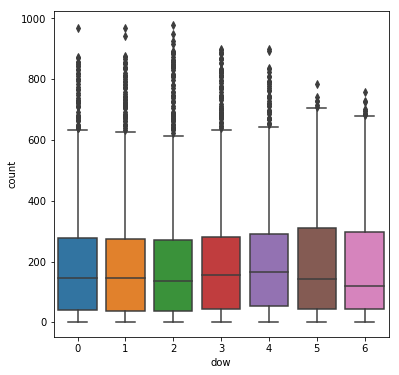

In [14]:
# see if there's more outliers on weekdays (0-4) or weekends (5-6)

fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
ax = sns.boxplot(data=df, y="count", x="dow")

This confirms weekdays (not just working days) have the most outliers. I'm going to keep them for now, and maybe later will remove them if necessary to see how it affects model accuracy.

 None]

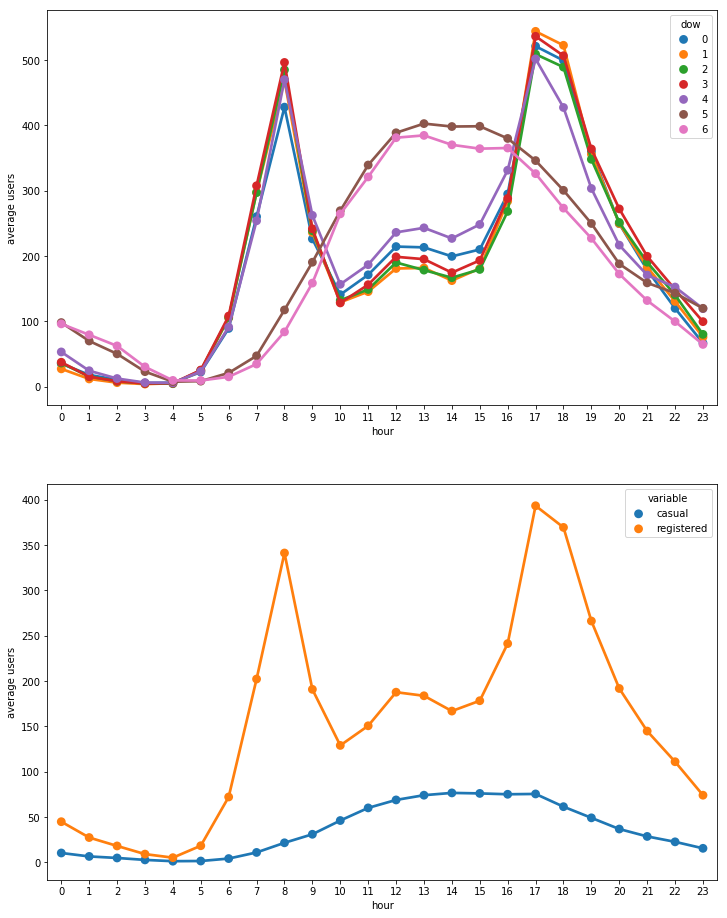

In [15]:
# another view: plot weekday vs. weekend and casual vs. registered average users per hour

fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(12,16)

hour_agg = pd.DataFrame(df.groupby(["hour","dow"], sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hour_agg["hour"], y=hour_agg["count"], hue=hour_agg["dow"], data=hour_agg, join=True, ax=ax1)
ax1.set(xlabel="hour", ylabel="average users", label="big")

hour_trans = pd.melt(df[["hour","casual","registered"]], id_vars=["hour"], value_vars=["casual", "registered"])
hour_agg = pd.DataFrame(hour_trans.groupby(["hour","variable"], sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hour_agg["hour"], y=hour_agg["value"], hue=hour_agg["variable"], hue_order=["casual","registered"], data=hour_agg, join=True, ax=ax2)
ax2.set(xlabel="hour", ylabel="average users", label="big")

It's pretty clear that weekend usage has a very different hourly pattern than weekdays. Weekend usage tends to be later in the day, is fairly consistent for at least 6 hours, and only has a single peak; whereas weekday usage is mostly aligned with commute times (two spikes) with a small relative lift around lunch hours. Also, it appears that generally weekday users are registered while weekend users are casual.

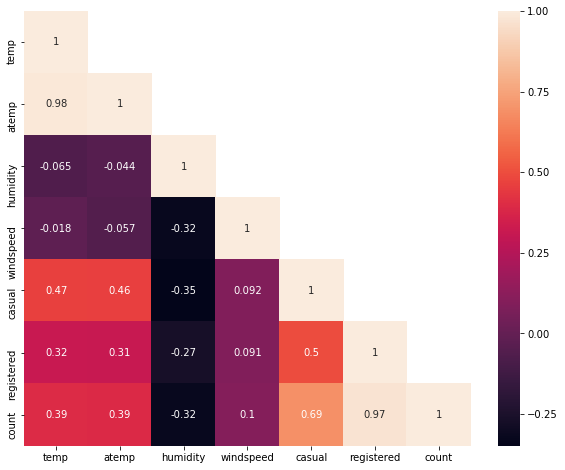

In [16]:
# show the correlation matrix for non-categorical (continuous) variables

corr_mat = df[["temp","atemp","humidity","windspeed","casual","registered","count"]].corr()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
sns.heatmap(corr_mat, mask=mask, annot=True) #mask=mask,vmax=.8, square=True,

**Observations:**
* Temp and atemp are both moderately positively correlated with count, and there doesn't appear to be any meaningful difference, so one of them can be dropped
* Casual users are more affected by temp/atemp and humidity than registered users, which makes sense since these are likely "discretionary" trips vs. commuters
* Windspeed doesn't appear to have much of an impact on count, and the 0.1 positive correlation seems to go agaist intuition - cyclists don't typically prefer to bike on days with higher wind

*I'm going to keep temp and humidity, but drop atemp and windspeed for now. Also remove casual and registered since they won't be used for training.*

In [17]:
df.drop(['windspeed','atemp','casual','registered'], axis=1, inplace=True)
df.head()

,season,holiday,workingday,weather,temp,humidity,count,hour,month,dow,year
0,1,0,0,1,9.84,81,16,0,1,5,2011
1,1,0,0,1,9.02,80,40,1,1,5,2011
2,1,0,0,1,9.02,80,32,2,1,5,2011
3,1,0,0,1,9.84,75,13,3,1,5,2011
4,1,0,0,1,9.84,75,1,4,1,5,2011


## A little bit of Feature Engineering

In [18]:
# convert categorical season and weather columns to dummy variables (k-1 of k categorical levels)
# season:
#    1 = spring
#    2 = summer
#    3 = fall
#    4 = winter
# weather:
#    1 = Clear, Few clouds, Partly cloudy
#    2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#    3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#    4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

df = pd.get_dummies(df, prefix=['season','weather'], columns=['season','weather'], drop_first=True)
df.head()

,holiday,workingday,temp,humidity,count,hour,month,dow,year,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,0,0,9.84,81,16,0,1,5,2011,0,0,0,0,0,0
1,0,0,9.02,80,40,1,1,5,2011,0,0,0,0,0,0
2,0,0,9.02,80,32,2,1,5,2011,0,0,0,0,0,0
3,0,0,9.84,75,13,3,1,5,2011,0,0,0,0,0,0
4,0,0,9.84,75,1,4,1,5,2011,0,0,0,0,0,0


# Modeling

## Linear Regression

In [19]:
feature_cols = ['holiday','workingday','temp','humidity','hour','month','dow','year','season_2','season_3','season_4','weather_2','weather_3','weather_4']
X_mult = df[feature_cols]
y_mult = df['count']

# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X_mult, y_mult, test_size=0.3, random_state=1)
print ("training data size:", X_train.shape)
print ("testing data size:", X_test.shape)

training data size: (7620, 14)
testing data size: (3266, 14)


In [134]:
# define Root Mean Squared Logarithmic Error (RMSLE) function for evaluating predictions
# it's throwing an "invalid value" error, due to a zero or negative passed to log

def sle(actual, predicted):
    """
    Taken from benhamner's Metrics library.
    Computes the squared log error.
    This function computes the squared log error between two numbers,
    or for element between a pair of lists or numpy arrays.
    Parameters
    ----------
    actual : int, float, list of numbers, numpy array
             The ground truth value
    predicted : same type as actual
                The predicted value
    Returns
    -------
    score : double or list of doubles
            The squared log error between actual and predicted
    """
    return (np.power(np.log(np.array(actual)+1) - 
            np.log(np.array(predicted)+1), 2))

def rmsle(targets, predictions):
    return np.sqrt((sle(targets, predictions)**2).mean())

In [136]:
# another version of RMSLE I tried, throwing same error

def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

In [137]:
# train on training set
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# generate predictions on training set and evaluate
y_pred_train = linreg.predict(X_train)
print ("training set RMSLE:", rmsle(y_train, y_pred_train))

# generate predictions on test set and evaluate
y_pred_test = linreg.predict(X_test)
print ("test set RMSLE:", rmsle(y_test, y_pred_test))

training set RMSLE: 1.17437348662
test set RMSLE: 1.14855327611


/Users/Arjun/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log1p
  """


*So I got the RMSLE functions to work by taking the absolute value of whatever's passed to log function (and reverted the functions back to their original state afterward). However I need to compare this output against Kaggle's calculations. More concerning is whether the "invalid value" is a zero or negative... if it's zero that could make sense, but the linear regression shouldn't be producing a negative.*

## Next steps

I'll move onto modeling using the entire training data set. First I'll make predictions for the test set and see what the RMSLE output is for the Kaggle submission. Then I'll tweak the above RMSLE functions to replicate that error evaluation when using the contest's test set, rather than splitting the training set into train/test split.

Other things to try (higher priority in bold):
* remove outliers
* **feature scaling**
* eliminate skewness
* **polynomial features**
* decision tree
* **random forest**
* **ensembling**

## Create first Kaggle submission

Use competition provided "train.csv" for linear regression, then make predictions on "test.csv" for a baseline Kaggle submission.

In [84]:
# create train and test dataframes, convert/extract desired features, drop unnecessary columns

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
datasets = [train, test]

for index, df in enumerate(datasets):
    df['datetime_converted'] = pd.to_datetime(df.datetime)
    df.drop('datetime', axis=1, inplace=True)
    df.rename(columns={'datetime_converted': 'datetime'}, inplace=True)
    hour_col = df['datetime']
    df.drop('datetime', axis=1, inplace=True)
    df.insert(0, 'datetime', hour_col)
    df["hour"] = df.datetime.dt.hour
    df["month"] = df.datetime.dt.month
    df["dow"] = df.datetime.dt.dayofweek
    df["year"] = df.datetime.dt.year
    df.drop(['windspeed','atemp'], axis=1, inplace=True)

train.drop(['casual','registered'], axis=1, inplace=True)
train = pd.get_dummies(train, prefix=['season','weather'], columns=['season','weather'], drop_first=True)
test = pd.get_dummies(test, prefix=['season','weather'], columns=['season','weather'], drop_first=True)

In [85]:
train.head()

,datetime,holiday,workingday,temp,humidity,count,hour,month,dow,year,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,81,16,0,1,5,2011,0,0,0,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,80,40,1,1,5,2011,0,0,0,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,80,32,2,1,5,2011,0,0,0,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,75,13,3,1,5,2011,0,0,0,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,75,1,4,1,5,2011,0,0,0,0,0,0


In [86]:
test.head()

,datetime,holiday,workingday,temp,humidity,hour,month,dow,year,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,10.66,56,0,1,3,2011,0,0,0,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,56,1,1,3,2011,0,0,0,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,56,2,1,3,2011,0,0,0,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,56,3,1,3,2011,0,0,0,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,56,4,1,3,2011,0,0,0,0,0,0


In [101]:
# define train and test sets

feature_cols = ['holiday','workingday','temp','humidity','hour','month','dow','year','season_2','season_3','season_4','weather_2','weather_3','weather_4']

X_train = train[feature_cols]
y_train = train['count']

X_test = test[feature_cols]

# fit linear regression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

# generate predictions on test set and create kaggle submission file

test['count'] = linreg.predict(X_test)
test['count'] = test['count'].astype(int)
test['count'] = test['count'].clip_lower(0) # convert negative values, which aren't accepted, to zero
test.to_csv('bikeshare_submission_linreg2.csv', index=False, columns=['datetime','count']) #linreg1 had negative values

In [102]:
test.head()

,datetime,holiday,workingday,temp,humidity,hour,month,dow,year,season_2,season_3,season_4,weather_2,weather_3,weather_4,count
0,2011-01-20 00:00:00,0,1,10.66,56,0,1,3,2011,0,0,0,0,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,56,1,1,3,2011,0,0,0,0,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,56,2,1,3,2011,0,0,0,0,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,56,3,1,3,2011,0,0,0,0,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,56,4,1,3,2011,0,0,0,0,0,0,0


### Check submission csv

In [103]:
submission = pd.read_csv("bikeshare_submission_linreg2.csv")
submission.head(10)

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
5,2011-01-20 05:00:00,0
6,2011-01-20 06:00:00,0
7,2011-01-20 07:00:00,5
8,2011-01-20 08:00:00,13
9,2011-01-20 09:00:00,40


### Result

* Kaggle score for linreg2.csv submission: 1.32769   
* Mean value benchmark: 1.58455
* Effective leaderboard position: 3003 / 3252 (7th percentile... pretty bad!)

### Observations

1. Basic linear regression without feature scaling is not a good model, given that 288 predicted values (4.4% of total) were either negative or zero. In the training data, the lowest value for bikeshare users for any hour was 1, so there's definitely room for improvement on the lower bounds (late night / early morning hour predictions).
2. To improve the regression, numeric attributes should be scaled. Since the humidity data is formatted as an integer representing percent (min 0 - max 100 in training set) and temp is a float representing degrees in Celsius (min 0.82 - max 41 in training set), these are definitely in need of scaling. It's probably also a good idea to include hour, month, dow, and year because they're not categorical booleans.
3. There's also the problem of skewness and outliers in the training dataset. For skewness, using the square root or log of count, alternatively doing a Box Cox transformation could help. To address outliers, those could just be removed.
4. Before proceeding with suggested changes in (2) and (3), I'd like to see how Random Forests fares with the existing features.

## Random Forests

In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

In [107]:
# create train/test split so we can estimate error and tune forest parameters before submission

X_bikeshare = train[feature_cols]
y_bikeshare = train['count']

X_rftrain, X_rftest, y_rftrain, y_rftest = train_test_split(X_bikeshare, y_bikeshare, test_size=0.4)

In [118]:
rf = RandomForestRegressor(n_estimators=500, bootstrap=True, oob_score=True, random_state=37)
rf.fit(X_rftrain, y_rftrain)
y_rfpred = rf.predict(X_rftest)

# although the kaggle competition uses RMSLE for scoring, I'm using RMSE for simplicity while tuning
# when both predicted and actual values are small, RMSE and RMSLE are similar
# generally, RMSLE penalizes underestimates more than overestimates

print ("Random Forest RMSE:", np.sqrt(mean_squared_error(y_rftest, y_rfpred)))

Random Forest RMSE: 40.6702666024


### Tuning

In [121]:
# list of values to try for n_estimators

estimator_range = range(20, 400, 20)

# list to store the average RMSE for each value of n_estimators

RMSE_scores = []

for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, bootstrap=True, oob_score=True, random_state=37)
    rfreg.fit(X_rftrain, y_rftrain)
    preds = rfreg.predict(X_rftest)
    rmse = np.sqrt(mean_squared_error(y_rftest, preds))
    RMSE_scores.append(rmse)

/Users/Arjun/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:720: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


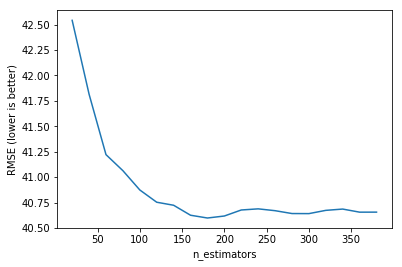

In [122]:
# plot n_estimators (x-axis) versus RMSE (y-axis)

plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')

Looks like RMSE begins to stabilize where n_estimators ~180, but I'll use 220 for tuning max_features next.

In [123]:
# list of values to try for max_features

feature_range = range(1, len(feature_cols)+1)

# list to store the average RMSE for each value of max_features

RMSE_scores = []

for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=220, bootstrap=True, 
                                  oob_score=True, max_features=feature, random_state=37)
    rfreg.fit(X_rftrain, y_rftrain)
    preds = rfreg.predict(X_rftest)
    rmse = np.sqrt(mean_squared_error(y_rftest, preds))
    RMSE_scores.append(rmse)

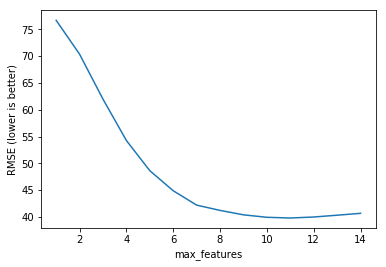

In [124]:
# plot n_estimators (x-axis) versus RMSE (y-axis)

plt.plot(feature_range, RMSE_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE (lower is better)')

And here the optimal number of max_features (lowest RMSE) is 11. Now to build the optimal forest.

In [126]:
rfreg_best = RandomForestRegressor(n_estimators=180, max_features=11, bootstrap=True, oob_score=True, random_state=37)
rfreg_best.fit(X_rftrain, y_rftrain)

preds = rfreg_best.predict(X_rftest)
rmse = np.sqrt(mean_squared_error(y_rftest,preds))
print ("Best Random Forest RMSE:",rmse)

Best Random Forest RMSE: 39.9035834451


Let's see how this compares to the RMSE for linear regression, now using the same train/test split.

In [127]:
linreg = LinearRegression()
linreg.fit(X_rftrain, y_rftrain)

lrpreds = linreg.predict(X_rftest)
lrrmse = np.sqrt(mean_squared_error(y_rftest,lrpreds))
print ("Linear regression RMSE:",lrrmse)

Linear regression RMSE: 139.180600937


The random forest is **significantly** better than linear regression! Now to build the random forest model across the entire training data, make predictions for test set, and see if I can improve my Kaggle score.

## Second Kaggle submission

In [135]:
rfreg = RandomForestRegressor(n_estimators=180, max_features=11, bootstrap=True, oob_score=True, random_state=37)
rfreg.fit(X_train, y_train)

test['count'] = rfreg.predict(X_test)
test['count'] = test['count'].astype(int)
test.head()

,datetime,holiday,workingday,temp,humidity,hour,month,dow,year,season_2,season_3,season_4,weather_2,weather_3,weather_4,count
0,2011-01-20 00:00:00,0,1,10.66,56,0,1,3,2011,0,0,0,0,0,0,11
1,2011-01-20 01:00:00,0,1,10.66,56,1,1,3,2011,0,0,0,0,0,0,4
2,2011-01-20 02:00:00,0,1,10.66,56,2,1,3,2011,0,0,0,0,0,0,3
3,2011-01-20 03:00:00,0,1,10.66,56,3,1,3,2011,0,0,0,0,0,0,3
4,2011-01-20 04:00:00,0,1,10.66,56,4,1,3,2011,0,0,0,0,0,0,3


In [136]:
test.to_csv('bikeshare_submission_rfreg1.csv', index=False, columns=['datetime','count'])

submission = pd.read_csv("bikeshare_submission_rfreg1.csv")
submission.head(10)

,datetime,count
0,2011-01-20 00:00:00,11
1,2011-01-20 01:00:00,4
2,2011-01-20 02:00:00,3
3,2011-01-20 03:00:00,3
4,2011-01-20 04:00:00,3
5,2011-01-20 05:00:00,5
6,2011-01-20 06:00:00,35
7,2011-01-20 07:00:00,96
8,2011-01-20 08:00:00,208
9,2011-01-20 09:00:00,125


In [137]:
submission.shape

(6493, 2)

### Result

* Kaggle score for rfreg1.csv submission: 0.47828   
* Effective leaderboard position: 1219 / 3252 (62nd percentile... much better! aka in top 38 percent)
* Improvement from linear regression: moved up 1,784 spots on leaderboard
* Top score: 0.33756

### Observations

1. The ensemble approach provides a vastly improved model for making predictions from the underlying data.
2. I avoided the issue of unscaled numeric features by choosing RF instead of linear regression; decision trees are not affected by unscaled attributes.
3. Skewness and outliers are still probably limiting the predictive accuracy.

## Closer look at Skewness

### Plot original distribution of count vs. three transformations

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([  0.        ,   0.        ,   0.        , ...,  24.58567448,
          24.60376287,  24.66687195])),
 (5.5637678293525372, 11.487239384101263, 0.98953438315047992))

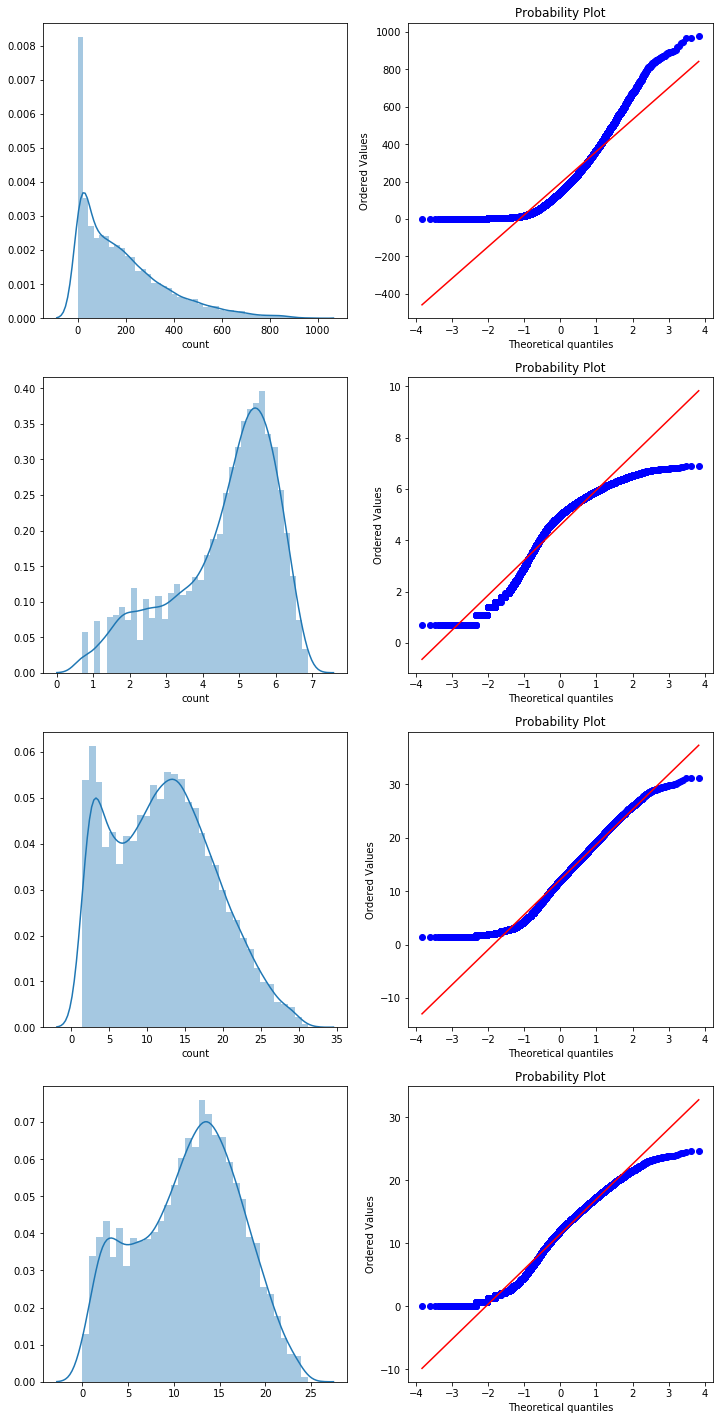

In [152]:
from scipy import stats

fig, axes = plt.subplots(ncols=2, nrows=4)
fig.set_size_inches(12, 25)

# plot distribution of count
sns.distplot(df["count"], ax=axes[0][0])
stats.probplot(df["count"], dist='norm', fit=True, plot=axes[0][1])

# plot distribution of log of count
log_count = np.log1p(df["count"])
sns.distplot(log_count, ax=axes[1][0])
stats.probplot(log_count, dist='norm', fit=True, plot=axes[1][1])

# plot distribution of square root of count
sqrt_count = np.sqrt(df["count"]+1)
sns.distplot(sqrt_count, ax=axes[2][0])
stats.probplot(sqrt_count, dist='norm', fit=True, plot=axes[2][1])

# plot distribution of boxcox transformed count
boxcox_count, power_val = stats.boxcox(df["count"])
sns.distplot(boxcox_count, ax=axes[3][0])
stats.probplot(boxcox_count, dist='norm', fit=True, plot=axes[3][1])

### Skewness calculations of original vs. transformations

In [154]:
# A skewness value > 0 means that there is more weight in the left tail of the distribution

all_skews = map(stats.skew, [df["count"], log_count, sqrt_count, boxcox_count])
list(zip(["original data skew", "natural log skew", "square root skew", "box-cox skew"], all_skews))

[('original data skew', 1.241895058803035),
 ('natural log skew', -0.851294310261887),
 ('square root skew', 0.2746539653369972),
 ('box-cox skew', -0.15393124794956947)]

In [155]:
print("Power used for box-cox transform:",power_val)

Power used for box-cox transform: 0.315670235792


The Box-Cox transformed count is the least skewed, although it still remains slightly skewed in the opposite direction, but that's as close as it'll be to a normal distribution. Now I'll double check the inverse transformation matches original count values and then create another Kaggle submission with RF based on Box-Cox transformed training data.

In [164]:
from scipy.special import inv_boxcox

df["count"].head(10)

0    16
1    40
2    32
3    13
4     1
5     1
6     2
7     3
8     8
9    14
Name: count, dtype: int64

In [163]:
print(boxcox_count[:10])

[ 4.43314545  6.98267424  6.29227393  3.95090989  0.          0.
  0.77482668  1.31318259  2.93937729  4.11940739]


In [162]:
print(inv_boxcox(boxcox_count, 0.315670235792)[:10])

[ 16.  40.  32.  13.   1.   1.   2.   3.   8.  14.]


## Third Kaggle submission

In [165]:
# apply box-cox transform on training y values and re-fit RF regression

y_train_boxcox, y_train_power = stats.boxcox(train['count'])

rfreg = RandomForestRegressor(n_estimators=180, max_features=11, bootstrap=True, oob_score=True, random_state=37)
rfreg.fit(X_train, y_train_boxcox)

test['count'] = rfreg.predict(X_test)

In [166]:
test.head()

,datetime,holiday,workingday,temp,humidity,hour,month,dow,year,season_2,season_3,season_4,weather_2,weather_3,weather_4,count
0,2011-01-20 00:00:00,0,1,10.66,56,0,1,3,2011,0,0,0,0,0,0,3.643598
1,2011-01-20 01:00:00,0,1,10.66,56,1,1,3,2011,0,0,0,0,0,0,1.762823
2,2011-01-20 02:00:00,0,1,10.66,56,2,1,3,2011,0,0,0,0,0,0,1.298681
3,2011-01-20 03:00:00,0,1,10.66,56,3,1,3,2011,0,0,0,0,0,0,1.437260
4,2011-01-20 04:00:00,0,1,10.66,56,4,1,3,2011,0,0,0,0,0,0,1.250779


In [167]:
# apply inverse box-cox on count for predicted bikeshare users

test['count'] = inv_boxcox(test['count'], y_train_power)
test.head()

,datetime,holiday,workingday,temp,humidity,hour,month,dow,year,season_2,season_3,season_4,weather_2,weather_3,weather_4,count
0,2011-01-20 00:00:00,0,1,10.66,56,0,1,3,2011,0,0,0,0,0,0,11.303989
1,2011-01-20 01:00:00,0,1,10.66,56,1,1,3,2011,0,0,0,0,0,0,4.061403
2,2011-01-20 02:00:00,0,1,10.66,56,2,1,3,2011,0,0,0,0,0,0,2.969351
3,2011-01-20 03:00:00,0,1,10.66,56,3,1,3,2011,0,0,0,0,0,0,3.271131
4,2011-01-20 04:00:00,0,1,10.66,56,4,1,3,2011,0,0,0,0,0,0,2.869638


In [168]:
# convert prediction to integer, export to csv, and review submission file

test['count'] = test['count'].astype(int)

test.to_csv('bikeshare_submission_rfreg2.csv', index=False, columns=['datetime','count'])

submission = pd.read_csv("bikeshare_submission_rfreg2.csv")
submission.head(10)

,datetime,count
0,2011-01-20 00:00:00,11
1,2011-01-20 01:00:00,4
2,2011-01-20 02:00:00,2
3,2011-01-20 03:00:00,3
4,2011-01-20 04:00:00,2
5,2011-01-20 05:00:00,5
6,2011-01-20 06:00:00,35
7,2011-01-20 07:00:00,91
8,2011-01-20 08:00:00,206
9,2011-01-20 09:00:00,120


Comparing these first 10 predictions to the last RF regression's shows a slight difference in count, which is desired. Let's see how Kaggle scores this...

### Result

* Kaggle score for rfreg2.csv submission: 0.45434   
* Effective leaderboard position: 883 / 3252 (72nd percentile... aka top 28 percent)
* Improvement from first RF regression: moved up another 336 spots

### Observations & Next Steps

1. Normalizing the training data definitely helped
2. Looking back at my EDA, most of the outliers are between 10am-3pm / 12am-4am and Monday-Friday. Given that weekdays account for approximately 71% of each week, even if less than 25% of training data are outliers, because of when they occur and more of the predictions are on weekdays, the outliers can have a big impact on model accuracy. How should they be addressed?
3. Maybe windspeed should be added back in to the model. It's probably a good idea to revisit feature selection and engineering at this point.
4. While it may not have a big impact since there aren't a ton of features here, I'd like to see how PCA would affect the predictive accuracy.
5. Create a pipeline to make iterative changes more efficient.

# Ford GoBike

### Classifying users: casual, registered, and "other"...

In [174]:
display(HTML('<iframe src="https://player.vimeo.com/video/228289007" width="640" height="360" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe><p><a href="https://vimeo.com/228289007">GoBike Hawk Hill Race</a> from <a href="https://vimeo.com/ornotbike">Ornot</a> on <a href="https://vimeo.com">Vimeo</a>.</p>'))